#### 1.Import all necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

#### 2.Import the data

In [2]:
data=pd.read_csv('car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


#### 3.Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.shape

(112, 2)

In [6]:
#statistics of data
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [31]:
#correlation between columns
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


In [7]:
#there is no null values, so no need of filling or droping
data.isna().sum()

Year     0
Price    0
dtype: int64

In [8]:
freq_graph = data.select_dtypes(include=['int'])
freq_graph

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


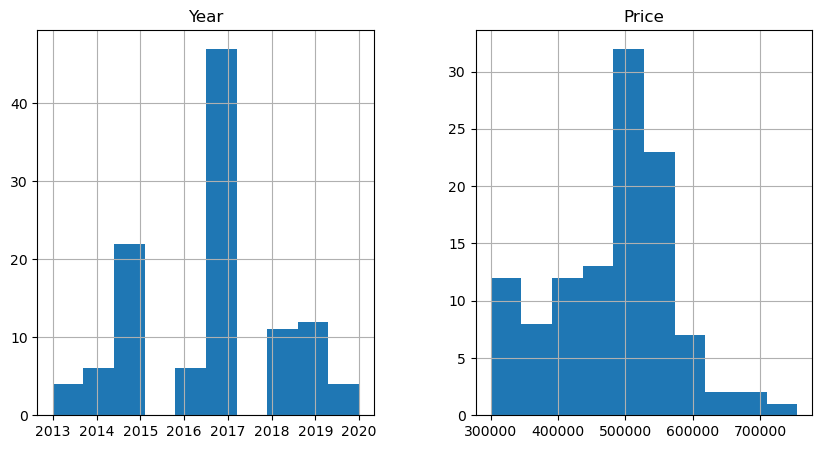

In [9]:
freq_graph.hist(figsize=(10,5))
plt.show()

#### 4.Data Preprocessing
#### There is no need of encoding as there is no categorical columns
# outliers and handling

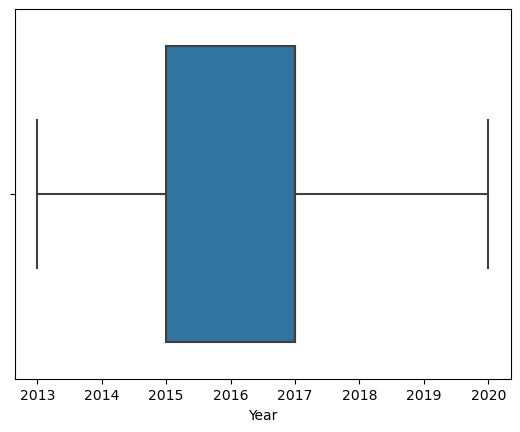

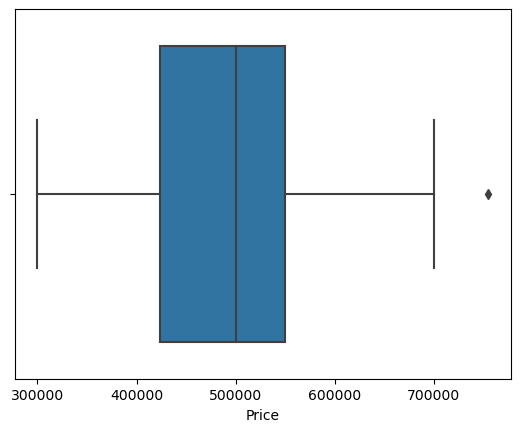

In [41]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

In [42]:
Q1=np.percentile(data['Price'],25,interpolation='midpoint')
Q2=np.percentile(data['Price'],50,interpolation='midpoint')
Q3=np.percentile(data['Price'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

422500.0 500000.0 550000.0


In [43]:
data['Price'].median()

500000.0

In [44]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [45]:
outlier=[]
for x in data['Price']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier        

[755000]

In [47]:
ind1=data['Price']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [49]:
ind1=data['Price']>up_lim
data.loc[ind1].index

Int64Index([1], dtype='int64')

In [50]:
data.drop([1], inplace=True)

In [51]:
ind1=data['Price']>up_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

[]

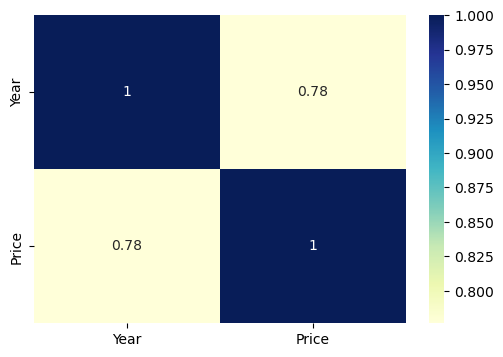

In [52]:
# correlation matrix
corr_matrix=data.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.plot()

#### Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
data.head()

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000


In [57]:
df = pd.DataFrame(data)

In [58]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled

,Year,Price
0,0.714286,0.4125
1,0.857143,1.0000
2,0.714286,0.4125
3,0.714286,0.4125
4,0.285714,0.1250
...,...,...
106,0.428571,0.1875
107,0.142857,0.0000
108,0.285714,0.3125
109,0.428571,0.3000


C:\Users\Saumya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saumya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saumya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

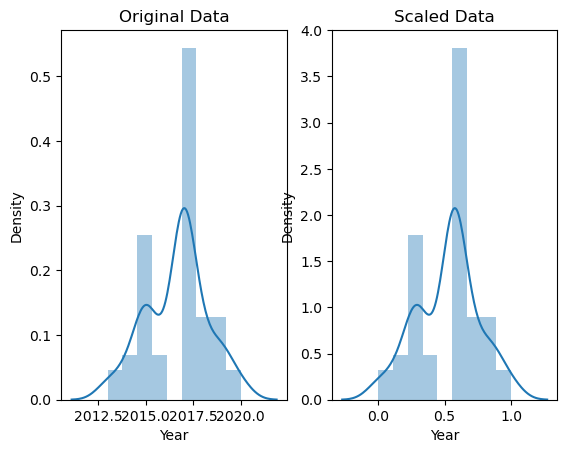

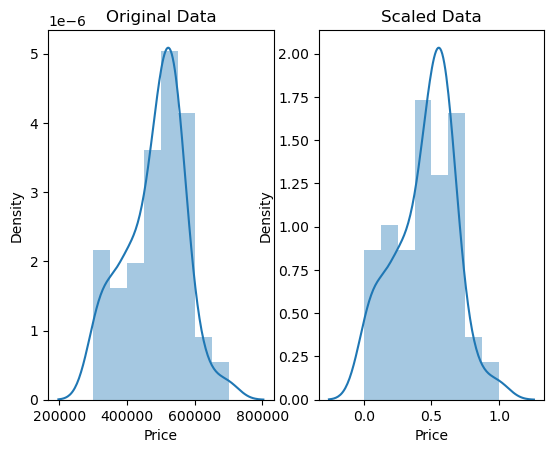

In [59]:
#plot dataset
for i in df:
    fig,ax=plt.subplots(1,2)
    sns.distplot(df[i],ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(df_scaled[i],ax=ax[1])
    ax[1].set_title("Scaled Data")

#### Normalize

In [60]:
from sklearn import preprocessing

In [88]:
df = preprocessing.normalize(data)
norm_df = pd.DataFrame(df, columns=data.columns)
norm_df

,Year,Price
0,0.004340,0.999991
1,0.002884,0.999996
2,0.004340,0.999991
3,0.004340,0.999991
4,0.005757,0.999983
...,...,...
106,0.005376,0.999986
107,0.006713,0.999977
108,0.004741,0.999989
109,0.004800,0.999988


C:\Users\Saumya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saumya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saumya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

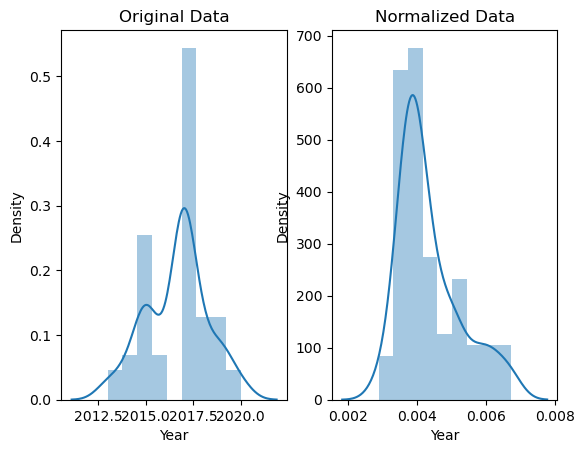

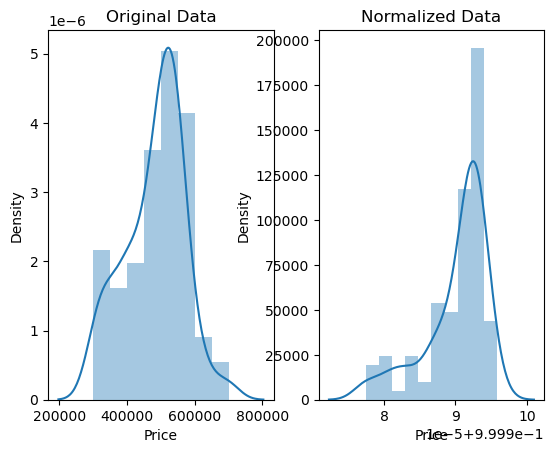

In [69]:
#plot the normalized data
for i in data:
    fig,ax=plt.subplots(1,2)
    sns.distplot(data[i],ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(norm_df[i],ax=ax[1])
    ax[1].set_title("Normalized Data")

#### 5.Modelling
#### 1.Linear Regression model

In [120]:
x=data.drop(['Price'], axis=1)
y=data['Price']

In [107]:
x

,Year
0,2018
2,2019
3,2018
4,2018
5,2015
...,...
107,2016
108,2014
109,2015
110,2016


In [108]:
y

0      465000
2      700000
3      465000
4      465000
5      350000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 111, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2 )

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model=lr.fit(x_train,y_train)

In [112]:
predictions=model.predict(x_test)

In [113]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean Squared Error =',mean_squared_error(y_test,predictions))
print('R Squared Value =',r2_score(y_test,predictions))

Mean Squared Error = 2360736941.0488067
R Squared Value = 0.7087665874512326


In [114]:
#predict the price of 2022 second-hand grand i10 model in Linear regression
predicted_price_lin_reg = lr.predict([[2022]])
print('Predicted Price of 2022 model second-hand grand i10 :', predicted_price_lin_reg)

Predicted Price of 2022 model second-hand grand i10 : [704536.23267838]


C:\Users\Saumya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 2.Lasso Regression model

In [115]:
from sklearn.linear_model import Lasso

In [116]:
##Fit the Lasso Regression model 
lasso = Lasso()
model1=lasso.fit(x_train, y_train)

In [117]:
### Finding out the lasso score
lasso.score(x_test, y_test), lasso.score(x_train, y_train)

predictions1=model1.predict(x_test)

In [118]:
### Calculating RMSE and Adjusted R-squared for the model

print('Mean Squared Error =',mean_squared_error(y_test,predictions1))
print('R Squared Value =',r2_score(y_test,predictions1))

Mean Squared Error = 2360749599.6382856
R Squared Value = 0.7087650258184441


In [119]:
### Predicting the Test set results
Y_pred_lasso = lasso.predict([[2022]])
print('Predicted Price of 2022 model second-hand grand i10 :', Y_pred_lasso)

Predicted Price of 2022 model second-hand grand i10 : [704534.09410547]


C:\Users\Saumya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


#### 6.Conclusion

#### Both Linear and Lasso models results are almost same.